# Literature Review Survey Processing

In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

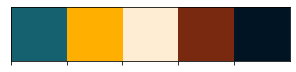

In [3]:
# color palette from Nancy's website
pclabcol = ['#15616F','#FFAF00', '#FEEDD3', '#792910','#001424']
# minus the cream
pclabcol2 = ['#001424','#FFAF00', '#15616F', '#792910']
# expanded
pclabcol3 = ['#15616F', '#AB796A','#FFAF00', '#FEEDD3', '#792910','#001424','#C5D7DB','#0B3137', '#FFEBBF','#9F6D00','#3C1508']
sns.palplot(sns.color_palette(pclabcol))
my_colors = ListedColormap(sns.color_palette(pclabcol))
my_colors2 = ListedColormap(sns.color_palette(pclabcol2))
my_colors3= ListedColormap(sns.color_palette(pclabcol3))

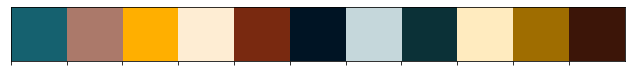

In [4]:
sns.palplot(sns.color_palette(pclabcol3))

In [5]:
# Plot Specifics
TITLESIZE = 60
AXESLABEL = 40
AXESTICKS = 35
LINWID = 10
DOTS = 20
LEGSIZE = 35

In [6]:
# Increase size of plot in jupyter



In [7]:
survey_df = pd.read_csv("Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)
#fill in an NaNs with actual data so this keep default nonsense isnt needed



In [8]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,"If female, ovariectiomized?",Social Agent Identity,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,6/16/2022 16:43:19,Behavioral deficits and progressive neuropatho...,"Yin, Fangfang",2010-12,Ryo Iwata,,yes,Mice,no,C57BL/6 mixed C57BL/6J mixed CD1,...,,unspecified female,does not specify,Does not specify,WT (wild type),yes,Yes,None,"Yes, this one was tricky.",Subject strain is hard to follow. Not sure if ...
1,3/1/2022 10:55:55,Learning and Memory and Synaptic Plasticity Ar...,"Moretti, Paolo",2006-01,Meghan Cum,,yes,Mice,no,129/SvEv,...,,juvenile male,Does not specify,Does not specify,WT (wild type),no,No,,,
2,3/1/2022 11:13:32,Early life modulators and predictors of adult ...,"Akers, Katherine",2006-07,Meghan Cum,,yes,Rats,no,Long-Evans,...,,adult not specified,singly-housed,Does not specify,WT (wild type),no,No,"Age, Strain, Housing History, Type (WT vs tran...",,
3,3/24/2022 13:10:08,Pharmacological effects of Ibuprofen on learni...,"Hashmi, Aisha",2015-04,Meghan Cum,,yes,Mice,no,BALB/c,...,,does not specify,Does not specify,Does not specify,WT (wild type),yes,Yes,Type (WT vs transgenic),"No, I feel confident, and I double-checked all...",
4,3/30/2022 15:35:44,The selective 5-HT6 receptor antagonist SLV ha...,"de Bruin, N.M.W.J.",2016-09,Jocelyn Santiago Perez,,yes,Rats,no,Wistar (Han) rats,...,,adult not specified,group-housed,Does not specify,WT (wild type),no,No,"Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",


In [9]:
survey_df.tail()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,"If female, ovariectiomized?",Social Agent Identity,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
664,6/16/2022 12:47:18,Effects of Bax gene deletion on social behavio...,"Holmes, M.M.",2011,Meghan Cum,,yes,Mice,no,C57Bl/6J,...,Yes,ovariectomized female,Does not specify,Does not specify,WT (wild type),no,Yes,None,"No, I feel confident, and I double-checked all...",
665,6/16/2022 13:01:34,Are Sema5a mutant mice a good model of autism?...,"Gunn, Rhian",2011-11,Meghan Cum,,yes,Mice,no,C57Bl/6 x 126Sv; C57BL/6J,...,,not specified male,Does not specify,Does not specify,WT (wild type),yes,Yes,None,"No, I feel confident, and I double-checked all...",
666,6/16/2022 13:13:20,Influence of Early Stress on Social Abilities ...,"Franklin, Tamara",2011-07,Meghan Cum,,yes,Mice,no,C57Bl/6J,...,no,"juvenile male, juvenile female",Does not specify,Does not specify,WT (wild type),no,No,"Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",
667,6/16/2022 20:30:37,Deletion of the forebrain mineralocorticoid re...,"ter Horst, Judith",2014-02,Jocelyn Santiago Perez,,yes,Mice,no,C57BL/6J,...,no,"adult male, adult intact female",group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",
668,6/17/2022 15:27:02,Juvenile social experience regulates central n...,"Tanaka, K.",2010-04,Jocelyn Santiago Perez,,yes,Rats,no,Long-Evans,...,Yes,ovariectomized juvenile female,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Housing History, Type (WT vs tran...","No, I feel confident, and I double-checked all...",


## total number of papers per year

- Updating the dates to years

In [10]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

In [11]:
year_to_number_of_papers_df = survey_df.groupby(["publication_year"]).size()
year_to_number_of_paper_dict = dict(zip(year_to_number_of_papers_df.index, year_to_number_of_papers_df.values))


#create extra columns 1) if mice were used, 2) if rats were used 

In [12]:
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [13]:
survey_df["Mice used"]

0      1
1      1
2      0
3      1
4      0
      ..
664    1
665    1
666    1
667    1
668    0
Name: Mice used, Length: 669, dtype: object

In [14]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")

In [15]:
rat_count = survey_df.groupby(["Rats used"], as_index=False).count()
rat_count

,Rats used,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used
0,0,396,396,396,396,396,396,396,396,396,...,396,396,396,396,396,396,396,396,396,396
1,1,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273


In [16]:
mouse_count = survey_df.groupby(['Mice used'], as_index=False).count()
mouse_count

,Mice used,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Rats used
0,0,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
1,1,404,404,404,404,404,404,404,404,404,...,404,404,404,404,404,404,404,404,404,404


## Trends in Sex of the Subject

In [17]:
survey_df["Subject Sex"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
664           Uses both
665           Uses both
666           Uses both
667           Uses both
668           Uses both
Name: Subject Sex, Length: 669, dtype: object

In [18]:
column_name = "Subject Sex"
fixed_column_name = column_name + "_fixed"
copy_of_survey_df = survey_df.copy()
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [19]:
sex_year_count = exploded_column_df.groupby(['publication_year',fixed_column_name], as_index=False).count()

sex_year_count 

,publication_year,Subject Sex_fixed,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used
0,2000,Male,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,2001,Female,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2001,Male,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,2002,Male,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,2003,Female,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2021,Male,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
71,2021,Uses both,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
72,2022,Female,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
73,2022,Male,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [20]:
sex_year_count = sex_year_count[['publication_year','Subject Sex_fixed','index']]
sex_year_count_no2022 = sex_year_count.drop([72,73,74], axis=0)
sex_year_count_no2022

,publication_year,Subject Sex_fixed,index
0,2000,Male,5
1,2001,Female,1
2,2001,Male,8
3,2002,Male,9
4,2003,Female,2
...,...,...,...
67,2020,Uses both,14
68,2021,Does not specify,1
69,2021,Female,5
70,2021,Male,48


In [21]:
sex_year_count_no2022[sex_year_count_no2022['Subject Sex_fixed'] == 'Female']['publication_year'].unique()


array([2001, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [22]:
sex_year_count_list = sex_year_count_no2022.values.tolist()

In [23]:
sex_list = ['Male', 'Female', 'Does not specify', 'Uses both']
for sex in sex_list:
    for year in set(sex_year_count_no2022['publication_year'].unique()) - set(sex_year_count_no2022[sex_year_count_no2022['Subject Sex_fixed'] == sex]['publication_year'].unique()):
        sex_year_count_list.append([year, sex, 0])      
    
                                                                          
                                                                          

In [24]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [25]:
sex_totals = pd.DataFrame(sex_year_count_list, columns=['publication_year', 'Subject Sex_fixed', 'total'])
sex_totals = sex_totals.groupby(['publication_year','Subject Sex_fixed', 'total'], as_index=False).count()
sex_totals

,publication_year,Subject Sex_fixed,total
0,2000,Does not specify,0
1,2000,Female,0
2,2000,Male,5
3,2000,Uses both,0
4,2001,Does not specify,0
...,...,...,...
83,2020,Uses both,14
84,2021,Does not specify,1
85,2021,Female,5
86,2021,Male,48


In [26]:
sex_totals['percent papers'] = sex_totals.apply(lambda x: x['total']/year_to_number_of_paper_dict[x['publication_year']]*100, axis=1)
sex_totals
    

,publication_year,Subject Sex_fixed,total,percent papers
0,2000,Does not specify,0,0.000000
1,2000,Female,0,0.000000
2,2000,Male,5,100.000000
3,2000,Uses both,0,0.000000
4,2001,Does not specify,0,0.000000
...,...,...,...,...
83,2020,Uses both,14,26.923077
84,2021,Does not specify,1,1.219512
85,2021,Female,5,6.097561
86,2021,Male,48,58.536585


In [27]:
sex_replacement = { 'Male' : 'male',
                   'Female' : 'female',
                   'Uses both' : 'uses both',
                   'Does not specify': 'not specified'}
sex_totals.loc[:,"Subject Sex_fixed"] = sex_totals.loc[:,"Subject Sex_fixed"].replace(sex_replacement)
sex_totals

,publication_year,Subject Sex_fixed,total,percent papers
0,2000,not specified,0,0.000000
1,2000,female,0,0.000000
2,2000,male,5,100.000000
3,2000,uses both,0,0.000000
4,2001,not specified,0,0.000000
...,...,...,...,...
83,2020,uses both,14,26.923077
84,2021,not specified,1,1.219512
85,2021,female,5,6.097561
86,2021,male,48,58.536585


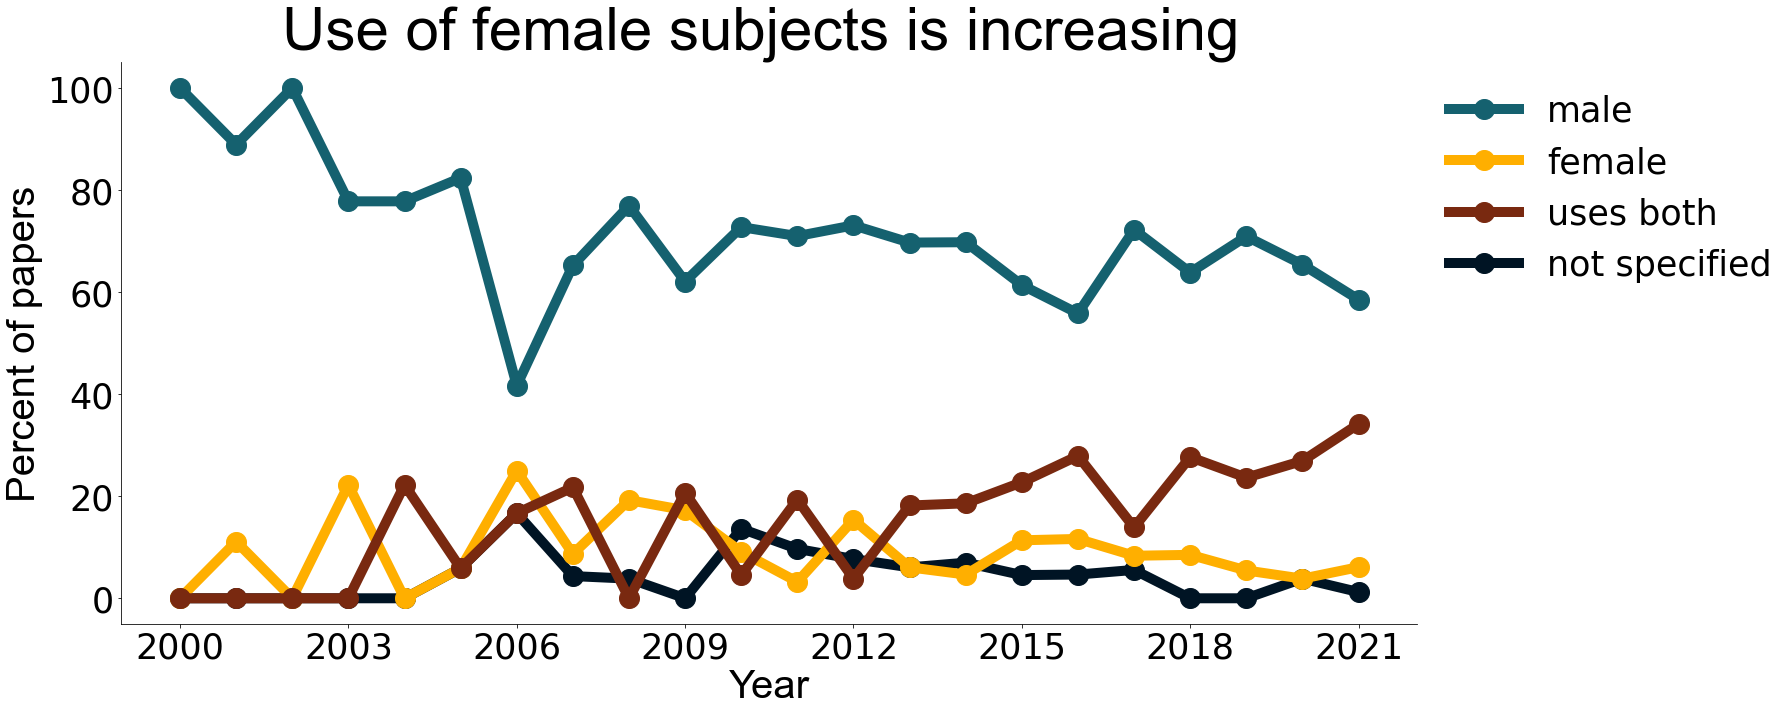

In [28]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots()
col = 0
#plt.text(family = "Helvetica")
for sex in sex_totals["Subject Sex_fixed"].unique():
    sex_df = sex_totals[sex_totals["Subject Sex_fixed"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["percent papers"], '-o', label=sex, linewidth=10, markersize=20, color = pclabcol2[col])
    col += 1
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,3,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = LEGSIZE, frameon = False,  bbox_to_anchor=(1, 1))
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
plt.xticks(sex_df["publication_year"].unique(), fontsize = AXESTICKS)
plt.locator_params(axis='x', nbins=10)
plt.yticks(fontsize = 35)
plt.title("Use of female subjects is increasing ", family = 'Arial', fontsize = 60)
plt.xlabel("Year", family = 'Arial', fontsize = 40)
plt.ylabel("Percent of papers", family = 'Arial', fontsize = 40)
# this makes svgs not cut off when saving, see: https://stackoverflow.com/questions/45239261/matplotlib-savefig-text-chopped-off
plt.tight_layout() 
plt.savefig("./proc/plots/year_vs_sex.svg")

## Trends in Age of the Subject

In [29]:
survey_df["Subject Age"]

0                                       does not specify
1                             adult (week not specified)
2                                    adult (12-24 weeks)
3                                       Does not specify
4                               young adult (8-12 weeks)
                             ...                        
664                             young adult (8-12 weeks)
665             adult (12-24 weeks), adult (24-40 weeks)
666                                     Does not specify
667             adult (12-24 weeks), adult (24-40 weeks)
668    juvenile (3-7 weeks or week not specified), yo...
Name: Subject Age, Length: 669, dtype: object

In [30]:
column_name = "Subject Age"

In [31]:
fixed_column_name = column_name + "_fixed"

In [32]:
copy_of_survey_df = survey_df.copy()

In [33]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [34]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()
exploded_column_df[fixed_column_name].unique()
simple_age_df = exploded_column_df

In [35]:
simple_age_df[fixed_column_name] = simple_age_df[fixed_column_name].replace(['adult (week not specified)',
       'adult (12-24 weeks)', 'adult (24-40 weeks)','adult (8-10 weeks)', 'young adult (8-12 weeks)'], 'adult')
simple_age_df[fixed_column_name] = simple_age_df[fixed_column_name].replace(['does not specify', 'Does not specify'], 'not specified')
simple_age_df[fixed_column_name] = simple_age_df[fixed_column_name].replace(['juvenile (3-7 weeks or week not specified)', 'juvenile (3-7 weeks)'], 'juvenile')
simple_age_df[fixed_column_name] = simple_age_df[fixed_column_name].replace(['infant (0-21 days)'], 'infant')
simple_age_df[fixed_column_name].unique()


array(['not specified', 'adult', 'juvenile', 'old (+40 weeks)', 'infant'],
      dtype=object)

In [36]:
#simple_age_df.groupby([fixed_column_name]).count()
simple_age_df = simple_age_df[['Subject Age_fixed', 'index']]
age_totals = simple_age_df.groupby([fixed_column_name]).count() 
age_totals
#.groupby([fixed_column_name]).sum()

,index
Subject Age_fixed,
adult,644
infant,6
juvenile,77
not specified,44
old (+40 weeks),33


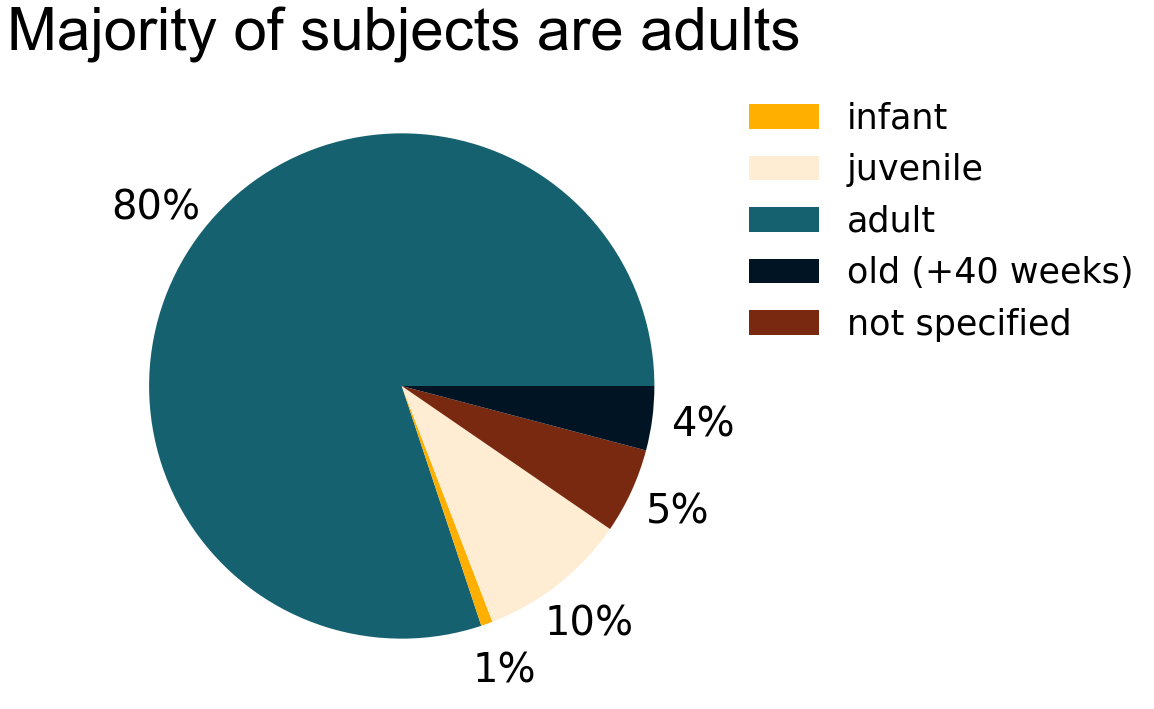

In [37]:
from matplotlib import cm
age_totals.plot(kind='pie',subplots = True,autopct='%1.0f%%', pctdistance=1.2, labeldistance=None,cmap=my_colors, fontsize = AXESLABEL)
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [1,2,0,4,3]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.0, 1.0),frameon = False, fontsize = LEGSIZE) #Moves legend and takes frame off
plt.suptitle("Majority of subjects are adults", fontsize = TITLESIZE, family = 'Arial')
plt.tight_layout() 
plt.ylabel("")
plt.savefig("./proc/plots/sub_age.svg")


##### Trends in Housing of the Subject

In [38]:
survey_df["Subject Housing"]

0      Does not specify
1      Does not specify
2         singly-housed
3      Does not specify
4         singly-housed
             ...       
664       singly-housed
665        group-housed
666        group-housed
667       singly-housed
668        group-housed
Name: Subject Housing, Length: 669, dtype: object

In [39]:
column_name = "Subject Housing"

In [40]:
fixed_column_name = column_name + "_fixed"

In [41]:
copy_of_survey_df = survey_df.copy()

In [42]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [43]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [44]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()
column_year_count = column_year_count[['publication_year', fixed_column_name, 'index']]
column_year_count


,publication_year,Subject Housing_fixed,index
0,2000,group-housed,2
1,2000,singly-housed,4
2,2001,group-housed,2
3,2001,singly-housed,8
4,2002,group-housed,4
...,...,...,...
77,2021,singly-housed,16
78,2021,singly-housed for more than a few hours and le...,7
79,2022,group-housed,6
80,2022,singly-housed,1


In [45]:
column_year_count.drop(79, axis = 0, inplace=True)
column_year_count.drop(80, axis = 0, inplace=True)
column_year_count.drop(81, axis = 0, inplace=True)
column_year_count


,publication_year,Subject Housing_fixed,index
0,2000,group-housed,2
1,2000,singly-housed,4
2,2001,group-housed,2
3,2001,singly-housed,8
4,2002,group-housed,4
...,...,...,...
74,2020,singly-housed for more than a few hours and le...,3
75,2021,Does not specify,15
76,2021,group-housed,60
77,2021,singly-housed,16


In [46]:
housing_opt = column_year_count[fixed_column_name].unique()
housing_opt = housing_opt.tolist()


In [47]:
housing_count_list = column_year_count.values.tolist()

In [48]:
for options in housing_opt:
    for year in set(column_year_count['publication_year'].unique()) - set(column_year_count[column_year_count[fixed_column_name] == options]['publication_year'].unique()):
        housing_count_list.append([year, options, 0])


In [49]:
housing_replacement = {'Does not specify':'not specified','singly-housed': 'chronic isolation', 'singly-housed for more than a few hours and less than a week' : 'acute isolation'}
housing_totals = pd.DataFrame(housing_count_list, columns = ['publication_year', 'Subject Housing_fixed','total'])
housing_totals = housing_totals.groupby(['publication_year', 'Subject Housing_fixed', 'total'], as_index=False).count()
housing_totals.loc[:,fixed_column_name] = housing_totals.loc[:, fixed_column_name].replace(housing_replacement)

In [50]:
housing_totals['percent papers'] = housing_totals.apply(lambda x: x['total']/year_to_number_of_paper_dict[x['publication_year']]*100, axis=1)
pd.set_option('display.max_rows', None)
housing_totals[fixed_column_name].unique()


array(['not specified', 'group-housed', 'chronic isolation',
       'acute isolation'], dtype=object)

In [51]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (25,10)

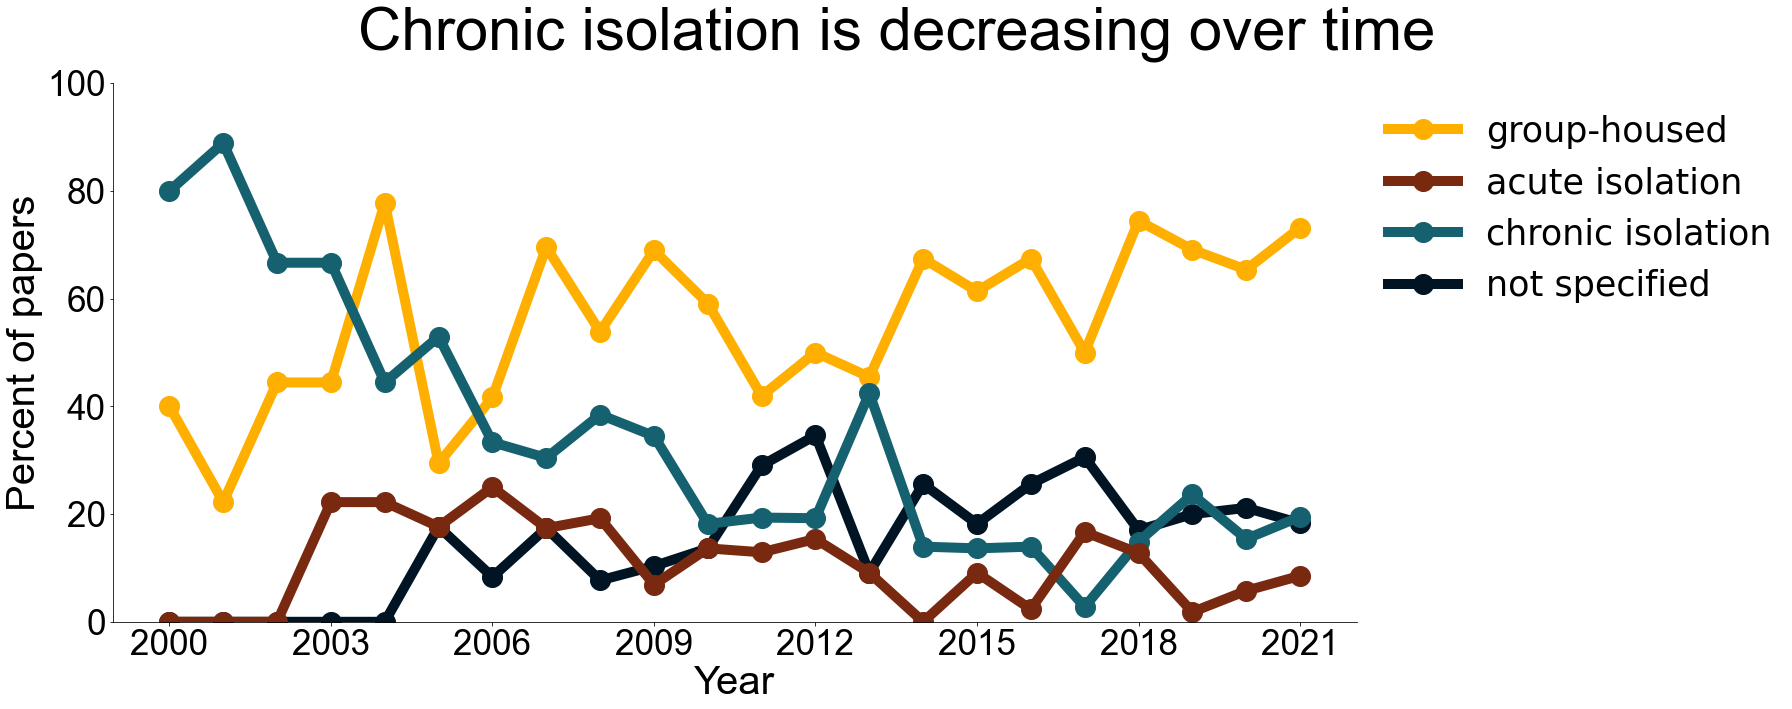

In [52]:
fig, ax = plt.subplots()
col = 0

for value in housing_totals[fixed_column_name].unique():
    type_df = housing_totals[housing_totals[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["percent papers"], '-o', label=value, linewidth = LINWID, markersize = DOTS, color = pclabcol2[col])
    col += 1
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [1,3,2,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = LEGSIZE ,frameon = False, bbox_to_anchor=(1, 1))
plt.xticks(column_year_count["publication_year"].unique())
plt.suptitle("Chronic isolation is decreasing over time", fontsize = TITLESIZE, family="Arial")
plt.xlabel("Year", fontsize = AXESLABEL, family="Arial")
plt.ylabel("Percent of papers", fontsize = AXESLABEL, family="Arial")
plt.xticks(fontsize = AXESTICKS, family="Arial")
plt.yticks(fontsize = AXESTICKS, family="Arial")

plt.locator_params(axis='x', nbins=10)
plt.ylim(0,100)
plt.tight_layout()
plt.savefig("./proc/plots/year_vs_housing.svg")


# # Subject Strains

In [53]:
strain_copy = survey_df.copy()
STRAIN = 'Final Strain'
strain_copy[STRAIN]

0                            C57BL/6 mix
1                                    129
2                             Long Evans
3                                 BALB/c
4                                 Wistar
5                                C57BL/6
6                                 Wistar
7                         Sprague Dawley
8                       Does not specify
9                         Swiss, C57BL/6
10                               C57BL/6
11                           C57BL/6 mix
12                                Wistar
13                                Wistar
14                               C57BL/6
15                                  CD-1
16                               C57BL/6
17                      Does not specify
18                      Does not specify
19                  C57BL/6, other mouse
20                               C57BL/6
21                               C57BL/6
22                               C57BL/6
23                      Does not specify
24              

In [54]:

strain_copy[STRAIN] = strain_copy[STRAIN].apply(lambda x: x.split(", "))
strains_df = strain_copy.explode(STRAIN).reset_index()
#strain_copy = strain_copy[[STRAIN]]
strains_df['Mice used']
mouse_mask = strains_df.loc[:, 'Mice used'] == '1'

# we want the rows that are true in mouse_mask
mouse_strains_df = strains_df.loc[mouse_mask, :].copy()

rat_mask = strains_df.loc[:, 'Rats used'] == '1'
rat_strains_df = strains_df.loc[rat_mask,:].copy()



In [55]:
# use .loc when modifying a df 
rat_strains_df.loc[:, STRAIN] = rat_strains_df.loc[:, STRAIN].replace({'other rat': 'other', 'WIstar': 'Wistar', 'Lister Hooded': 'other', 'Does not specify': 'not specified'})

In [56]:
rows_with_bad_strains = rat_strains_df.loc[:, STRAIN] == 'other rat'
rat_strains_df.loc[rows_with_bad_strains, STRAIN]

Series([], Name: Final Strain, dtype: object)

In [57]:
# checking that it replaced 
rat_strains_df[STRAIN].unique()

array(['Long Evans', 'Wistar', 'Sprague Dawley', 'not specified',
       'Brattleboro', 'CD-1', 'other', 'BALB/c', 'C57BL/6', 'other mouse',
       'C57BL/6 mix'], dtype=object)

In [58]:
rat_strains_df[[STRAIN, 'index']]

,Final Strain,index
2,Long Evans,2
4,Wistar,4
6,Wistar,6
7,Sprague Dawley,7
8,not specified,8
13,Wistar,12
14,Wistar,13
18,not specified,17
30,Wistar,27
34,Wistar,30


In [59]:
rat_strains_df = rat_strains_df[[STRAIN, 'index']]
rat_total = rat_strains_df.groupby(STRAIN).count()
rat_total.drop(['BALB/c','C57BL/6','C57BL/6 mix','CD-1','other mouse'], axis = 0, inplace=True)
rat_total = rat_total.sort_values(by=['index'], ascending=False)
rat_total


,index
Final Strain,
Wistar,166
Sprague Dawley,83
Long Evans,13
Brattleboro,5
other,5
not specified,4


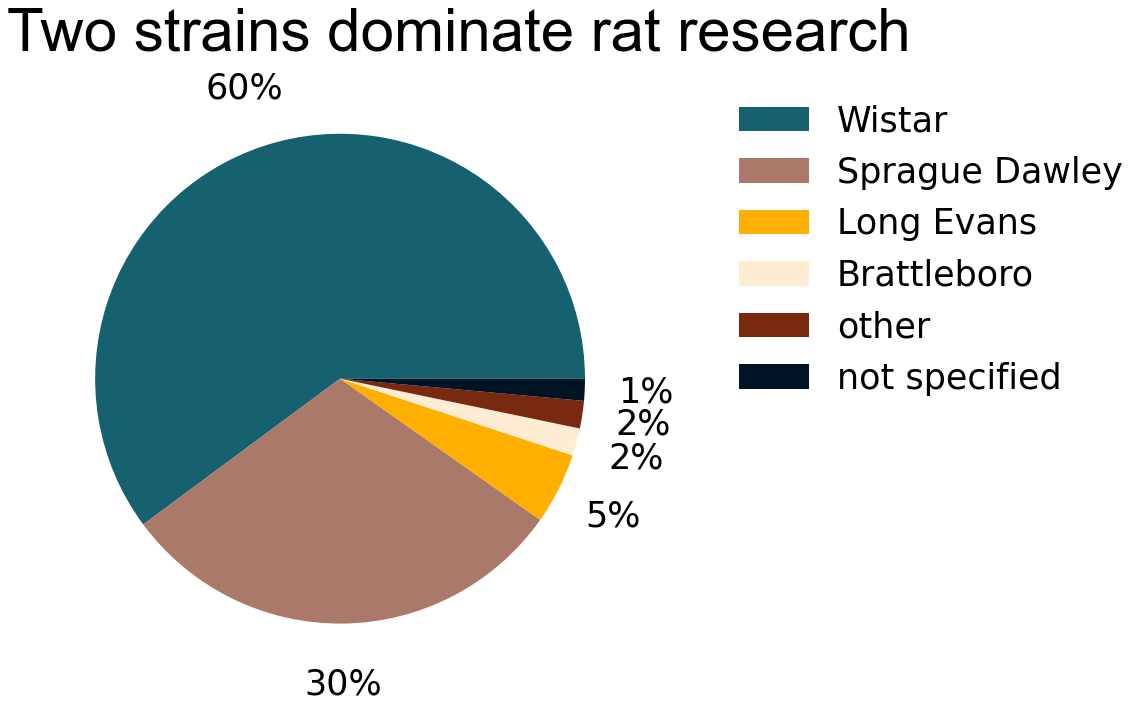

In [60]:
wedges, labels, autopct = plt.pie(rat_total['index'], labels=rat_total.index.values, autopct='%1.0f%%', pctdistance=1.25, labeldistance=None,colors=pclabcol3,  textprops={'fontsize': 35})         
plt.legend(rat_total.index.values, bbox_to_anchor=(1.1, 1.0),frameon = False, fontsize = LEGSIZE) #Moves legend and takes frame off
plt.ylabel('')
plt.suptitle('Two strains dominate rat research', fontsize = TITLESIZE, family = 'Arial', x = 0.55)
plt.tight_layout() 
plt.savefig("./proc/plots/rat_strain.svg")

In [61]:
mouse_strains_df = mouse_strains_df[[STRAIN, 'index']]
mouse_strains_total = mouse_strains_df.groupby(STRAIN).count()
mouse_strains_total.drop(['Wistar','Sprague Dawley'], axis = 0, inplace=True)
mouse_strains_total = mouse_strains_total.sort_values(by=['index'], ascending=False)

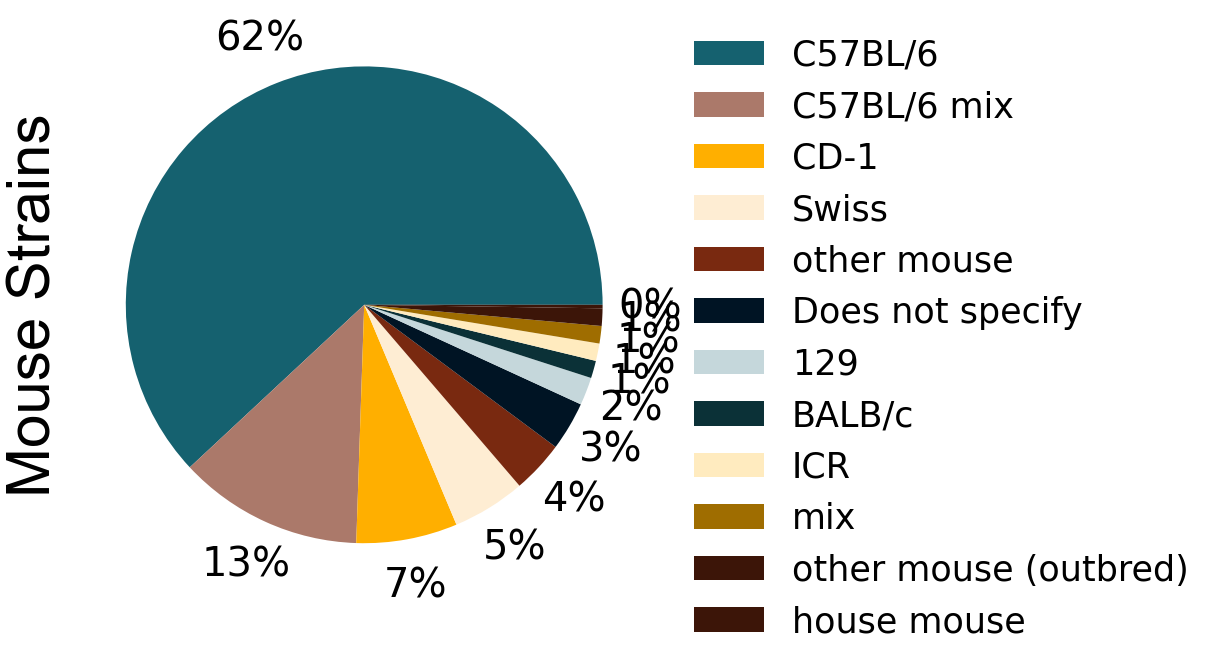

In [62]:
mouse_strains_total.plot(kind='pie',subplots = True,autopct='%1.0f%%', pctdistance=1.2, labeldistance=None,cmap=my_colors3, fontsize = AXESLABEL)
plt.legend(bbox_to_anchor=(1.0, 1.0),frameon = False, fontsize = LEGSIZE) #Moves legend and takes frame off
plt.ylabel("Mouse Strains", fontsize = TITLESIZE, family = 'Arial')
plt.tight_layout() 
plt.savefig("./proc/plots/mouse_strain.svg")

In [63]:
# less mice options 
mouse_strains_total_concise = mouse_strains_df.copy()

mouse_name_replacement = {'other mouse (outbred)': 'other',
                          'mix' : 'other',
                          'other mouse' : 'other', 
                          'ICR' : 'other', 
                          'house mouse': 'other',
                         'Does not specify' : 'not specified',
                         '129':'129/Sv'}

mouse_strains_total_concise.loc[:, STRAIN] = mouse_strains_total_concise.loc[:, STRAIN].replace(mouse_name_replacement)

mouse_strains_total_concise[STRAIN].unique()



array(['C57BL/6 mix', '129/Sv', 'BALB/c', 'C57BL/6', 'Swiss', 'CD-1',
       'not specified', 'other', 'Wistar', 'Sprague Dawley'], dtype=object)

In [64]:
mouse_strains_concise = mouse_strains_total_concise.groupby(STRAIN).count()
mouse_strains_concise.drop(['Wistar','Sprague Dawley'], axis = 0, inplace=True)
mouse_strains_concise = mouse_strains_concise.sort_values(by=['index'], ascending=False)

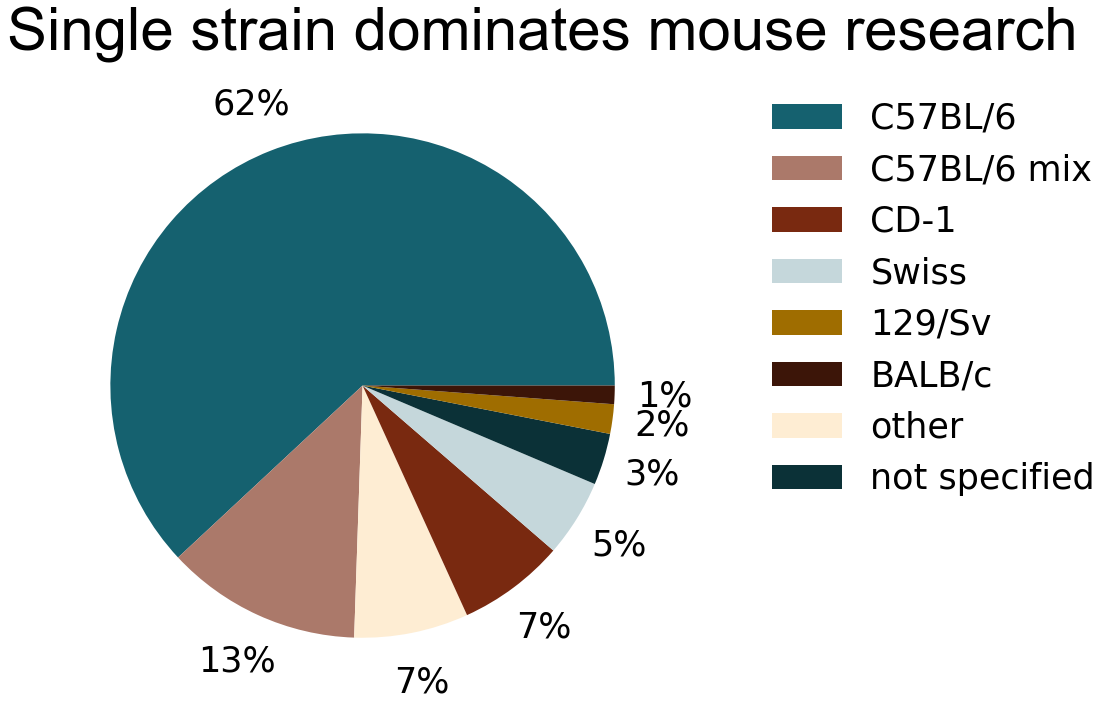

In [65]:
mouse_strains_concise.plot(kind='pie',subplots = True,autopct='%1.0f%%', pctdistance=1.2, labeldistance=None,cmap=my_colors3, fontsize = 35)
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,1,3,4,6,7,2,5]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.1, 1.0),frameon = False, fontsize = LEGSIZE) #Moves legend and takes frame off
plt.ylabel("")
plt.suptitle('Single strain dominates mouse research', fontsize = TITLESIZE, family = 'Arial', x= 0.6)
plt.tight_layout() 
plt.savefig("./proc/plots/mouse_strain_concise.svg")

## Breakdown of Rank

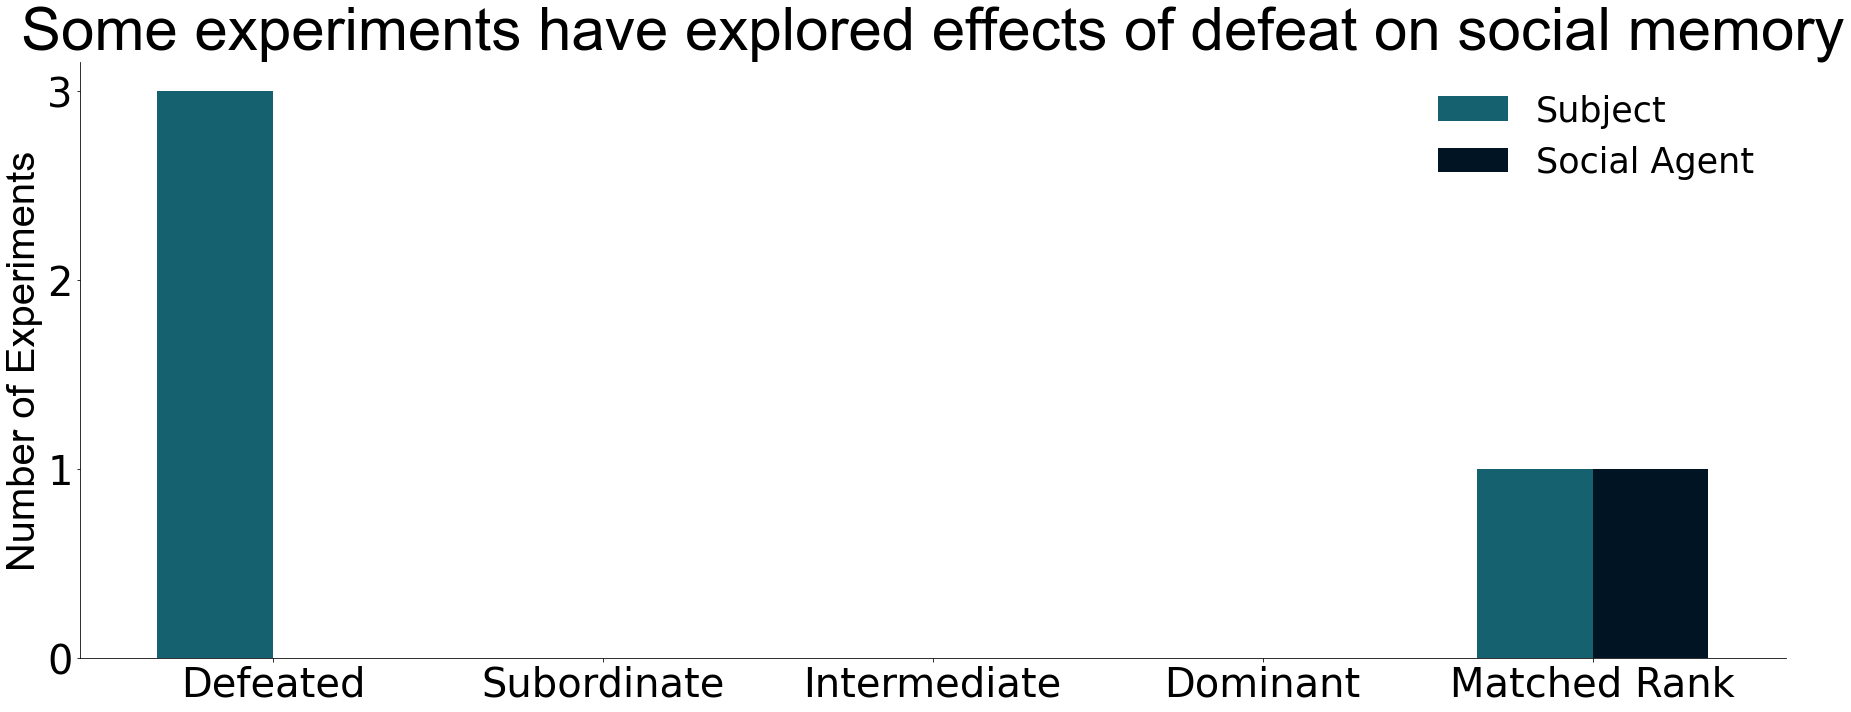

In [66]:

plt.rcParams["figure.figsize"] = (25,10)
rank_dict = {'Subject':
         {'Defeated': 3,
         'Subordinate':0,
          'Intermediate' : 0,
          'Dominant' : 0,
         'Matched Rank':1 },
         
         'Social Agent':
         {'Defeated': 0,
         'Subordinate':0,
          'Intermediate': 0,
          'Dominant' : 0,
         'Matched Rank':1}}


labels = ['Defeated', 'Subordinate', 'Intermediate', 'Dominant', 'Matched Rank']
subject = [3, 0, 0, 0, 1]
social_agent = [0,0,0,0,1]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, subject, width, label='Subject', color = pclabcol[0])
rects2 = ax.bar(x + width/2, social_agent, width, label='Social Agent', color = pclabcol[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Experiments', fontsize = AXESLABEL, family = 'Arial')
ax.set_yticks([0,1,2,3], [0,1,2,3], fontsize = AXESLABEL)
ax.set_title('Some experiments have explored effects of defeat on social memory', fontsize = TITLESIZE, family = 'Arial')
ax.set_xticks(x, labels, fontsize = AXESLABEL)
ax.legend(fontsize = LEGSIZE ,frameon = False, bbox_to_anchor=(1, 1))
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

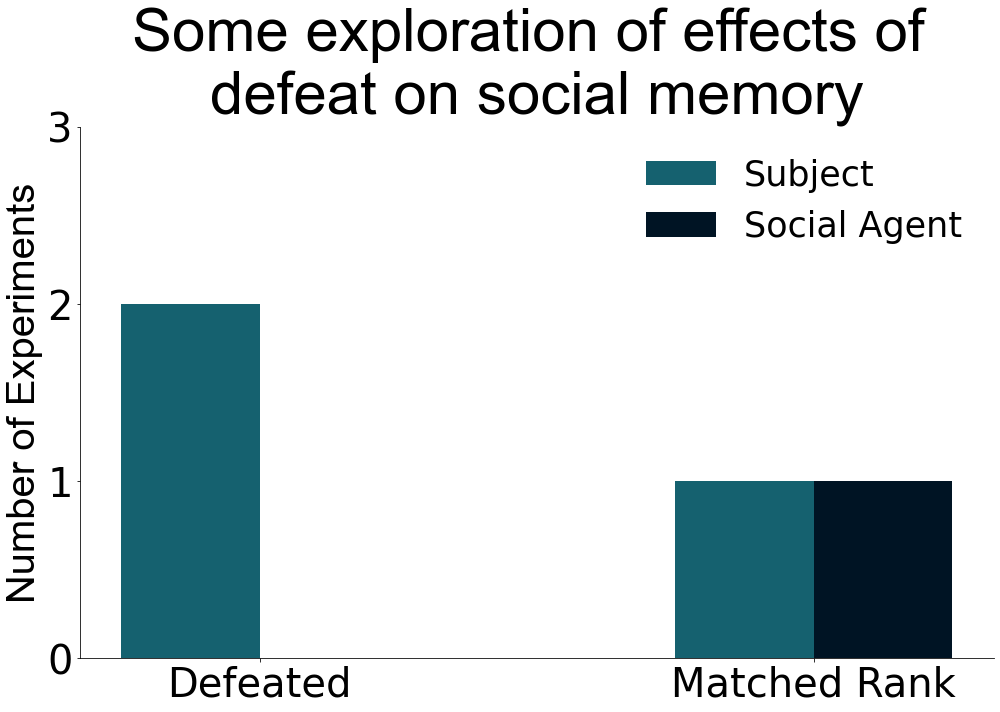

In [67]:

plt.rcParams["figure.figsize"] = (14,10)
labels_1 = ['Defeated', 'Matched Rank']
subject_1 = [2, 1]
social_agent_1 = [0,1]
x = np.arange(len(labels_1))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, subject_1, width, label='Subject', color = pclabcol[0])
rects2 = ax.bar(x + width/2, social_agent_1, width, label='Social Agent', color = pclabcol[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Experiments', fontsize = AXESLABEL, family = 'Arial')
ax.set_yticks([0,1,2,3], [0,1,2,3], fontsize = AXESLABEL)
ax.set_title('Some exploration of effects of \ndefeat on social memory', fontsize = TITLESIZE, family = 'Arial')
ax.set_xticks(x, labels_1, fontsize = AXESLABEL)
ax.legend(fontsize = LEGSIZE ,frameon = False, bbox_to_anchor=(1, 1))
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('./proc/plots/rank_report.svg')